# Medical Trial: K-armed Bandit Problem Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Creating the classes

In [825]:
class BanditMedTrial():
    def __init__(self, k, rewards):
        self.k = k
        self.q_reward = rewards

    def get_reward(self, action):
        return np.random.normal(self.q_reward[action], 6)

class AgentDoctor():
    def __init__(self, actions, epsilon, alpha, initial_q, is_ucb=False, c=0):
        self.actions = actions
        self.epsilon = epsilon
        self.alpha = alpha
        self.q_estimates = np.full(actions, initial_q, dtype=float)
        self.action_counts = np.zeros(actions, dtype=float)
        self.is_ucb = is_ucb
        self.c = c
        self.total_steps = 0

    def select_action(self):
        r = np.random.rand()

        # For Upper Confidence Bound
        if self.is_ucb:
            self.total_steps += 1
            
            if 0 in self.action_counts:
                return np.argmin(self.action_counts)  # Pick untried action first

            ucb_values = self.q_estimates + self.c * np.sqrt(np.log(self.total_steps) / self.action_counts)
            return np.argmax(ucb_values)

        # For both Epsilon greedy and Optimistic Initialization
        if r < self.epsilon:
            return np.random.randint(self.actions)
        else:
            return np.argmax(self.q_estimates)

        

    def update_estimates(self, action, reward):
        self.action_counts[action] += 1

        self.q_estimates[action] = self.q_estimates[action] + self.alpha * (reward - self.q_estimates[action])
            

def run_bandit(actions, epsilon, alpha, initial_q, time_steps, is_ucb=False, c=0):
    MedTrial = BanditMedTrial(k=3, rewards=np.array([1, 3, 6]))
    Doctor = AgentDoctor(actions=actions, epsilon=epsilon, alpha=alpha, initial_q=initial_q, is_ucb=is_ucb, c=c)
    rewards = np.zeros(time_steps)
    
    for t in range(time_steps):
        action = Doctor.select_action()
        reward = MedTrial.get_reward(action=action)
        Doctor.update_estimates(action=action, reward=reward)
        rewards[t] = reward

    return rewards

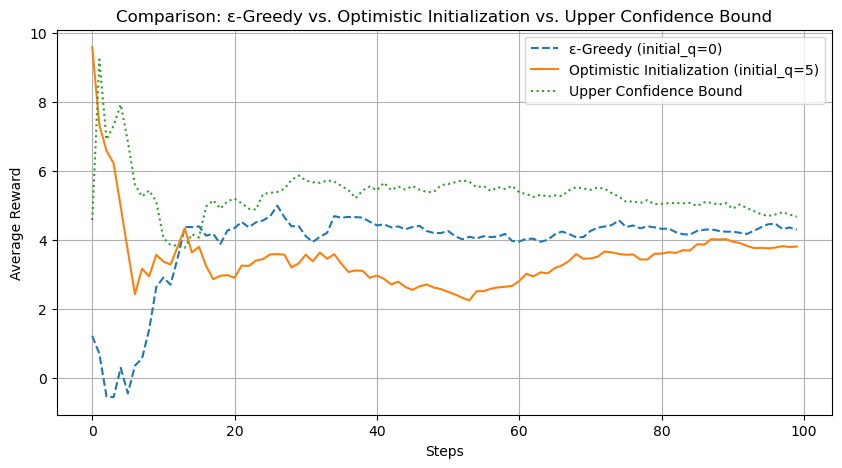

In [831]:
N = 100

np.random.seed(10)

greedy_rewards = run_bandit(actions=3, epsilon=0.3, alpha=0.5, initial_q=0, time_steps=N);
optimistic_rewards = run_bandit(actions=3, epsilon=0.3, alpha=0.5, initial_q=5, time_steps=N);
ucb_rewards = run_bandit(actions=3, epsilon=0.3, alpha=0.5, initial_q=5, time_steps=N, is_ucb=True, c=np.sqrt(2));

greedy_avg_rewards = np.cumsum(greedy_rewards, dtype=float) / (np.arange(N) + 1)
optimistic_avg_rewards = np.cumsum(optimistic_rewards, dtype=float) / (np.arange(N) + 1)
ucb_avg_rewards = np.cumsum(ucb_rewards, dtype=float) / (np.arange(N) + 1)

plt.figure(figsize=(10,5))
plt.plot(greedy_avg_rewards, label="ε-Greedy (initial_q=0)", linestyle="--")
plt.plot(optimistic_avg_rewards, label="Optimistic Initialization (initial_q=5)", linestyle="-")
plt.plot(ucb_avg_rewards, label="Upper Confidence Bound", linestyle=":")

plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Comparison: ε-Greedy vs. Optimistic Initialization vs. Upper Confidence Bound")
plt.legend()
plt.grid()
plt.show()